In [1]:
import pandas as pd 
import pickle
import re
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from tensorflow import keras
import pydot
from sklearn.preprocessing import OneHotEncoder

Unpack the CIFAR-10 file

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict1 = pickle.load(fo, encoding='bytes')
    return dict1
pd_tr = pd.DataFrame()
tr_y = pd.DataFrame()
for i in range(1,6):
    data = unpickle('cifar-10-batches-py/data_batch_' + str(i))
    pd_tr = pd_tr.append(pd.DataFrame(data[b'data']))
    tr_y = tr_y.append(pd.DataFrame(data[b'labels']))
    pd_tr['labels'] = tr_y
tr_x = np.asarray(pd_tr.iloc[:, :3072])
tr_y = np.asarray(pd_tr['labels'])
ts_x = np.asarray(unpickle('cifar-10-batches-py/test_batch')[b'data'])
ts_y = np.asarray(unpickle('cifar-10-batches-py/test_batch')[b'labels'])    
labels = unpickle('cifar-10-batches-py/batches.meta')[b'label_names']

One-Hot Encode the label and normalize the paixel values

In [3]:
ohe = OneHotEncoder()
ohe.fit(tr_y.reshape(-1,1))
tr_ye = ohe.transform(tr_y.reshape(-1,1))
tr_ya=tr_ye.toarray()
for i in range(len(tr_ya)):
    a=tf.math.argmax(tr_ya[i])
    tr_ya[i][np.array(a)]=1
trx1=tr_x/255

Simple multiclass logistic regression

In [4]:
lr=keras.Sequential(
[
    layers.Dense(10,activation="sigmoid")
])
lr.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history1=lr.fit(trx1,tr_y, epochs=50, batch_size=5000)

Epoch 1/50
10/10 [==============================] - 1s 79ms/step - loss: 2.2573 - accuracy: 0.1381
Epoch 2/50
10/10 [==============================] - 1s 90ms/step - loss: 2.0640 - accuracy: 0.2540
Epoch 3/50
10/10 [==============================] - 1s 93ms/step - loss: 1.9514 - accuracy: 0.3044
Epoch 4/50
10/10 [==============================] - 1s 92ms/step - loss: 1.8923 - accuracy: 0.3332 0s - loss: 1.9001 - ac
Epoch 5/50
10/10 [==============================] - 1s 86ms/step - loss: 1.8601 - accuracy: 0.3511
Epoch 6/50
10/10 [==============================] - 1s 76ms/step - loss: 1.8438 - accuracy: 0.3569
Epoch 7/50
10/10 [==============================] - 1s 88ms/step - loss: 1.8269 - accuracy: 0.3651
Epoch 8/50
10/10 [==============================] - 1s 86ms/step - loss: 1.8146 - accuracy: 0.3723
Epoch 9/50
10/10 [==============================] - 1s 87ms/step - loss: 1.8049 - accuracy: 0.3766
Epoch 10/50
10/10 [==============================] - 1s 97ms/step - loss: 1.7970 - acc

Complex ANN

In [5]:
ann=keras.Sequential(
[
    layers.Dense(100,activation="relu"),
    layers.Dense(100,activation="relu"),
    layers.Dense(100,activation="relu"),
    layers.Dense(10,activation="softmax")
    
])
ann.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
history2=ann.fit(trx1,tr_y, epochs=50, batch_size=5000)

Epoch 1/50
10/10 [==============================] - 1s 147ms/step - loss: 2.2851 - accuracy: 0.1510
Epoch 2/50
10/10 [==============================] - 2s 158ms/step - loss: 2.0818 - accuracy: 0.2313
Epoch 3/50
10/10 [==============================] - 1s 139ms/step - loss: 1.9614 - accuracy: 0.2882
Epoch 4/50
10/10 [==============================] - 1s 148ms/step - loss: 1.8922 - accuracy: 0.3265
Epoch 5/50
10/10 [==============================] - 2s 157ms/step - loss: 1.8532 - accuracy: 0.3396
Epoch 6/50
10/10 [==============================] - 1s 144ms/step - loss: 1.8138 - accuracy: 0.3545
Epoch 7/50
10/10 [==============================] - 1s 149ms/step - loss: 1.7795 - accuracy: 0.3660
Epoch 8/50
10/10 [==============================] - 1s 141ms/step - loss: 1.7557 - accuracy: 0.3771
Epoch 9/50
10/10 [==============================] - 1s 144ms/step - loss: 1.7330 - accuracy: 0.3848
Epoch 10/50
10/10 [==============================] - 1s 148ms/step - loss: 1.7101 - accuracy: 0.3933

Visualize the difference

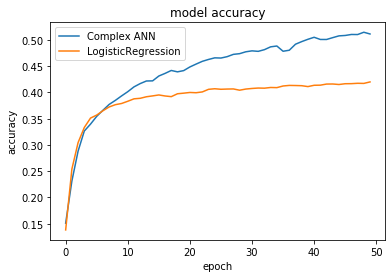

In [6]:
plt.plot(history2.history['accuracy'])
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Complex ANN', 'LogisticRegression'], loc='upper left')
plt.show()

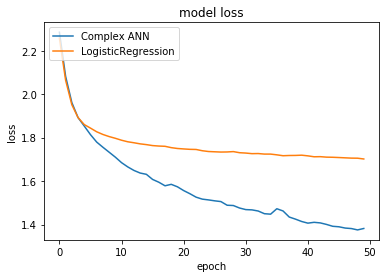

In [9]:
plt.plot(history2.history['loss'])
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Complex ANN', 'LogisticRegression'], loc='upper left')
plt.show()